# Diabetes 130

In [1]:
import zipfile
import pandas as pd
from anndata import AnnData

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip

--2022-01-31 13:33:15--  http://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3347213 (3,2M) [application/x-httpd-php]
Saving to: ‘dataset_diabetes.zip.2’

dataset_diabetes.zi 100%[===================>]   3,19M   598KB/s    in 11s     

2022-01-31 13:33:27 (308 KB/s) - ‘dataset_diabetes.zip.2’ saved [3347213/3347213]



In [4]:
with zipfile.ZipFile("dataset_diabetes.zip", 'r') as zip_ref:
    zip_ref.extractall("diabetes_130")

# Data Wrangling

In [36]:
data = pd.read_csv("diabetes_130/dataset_diabetes/diabetic_data.csv",
                   sep=",",
                   index_col="encounter_id",
                   na_values="?")

/Users/nastassya.horlava/opt/anaconda3/envs/ehrapy_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
data.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [38]:
data.describe(include="all")

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,99493,101766,101766,3197,101766.000000,101766.000000,101766.000000,101766.000000,61510,51817,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101745,101408,100343,101766.000000,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,5,3,10,9,NaN,NaN,NaN,NaN,17,72,NaN,NaN,NaN,NaN,NaN,NaN,716,748,789,NaN,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,NaN,Caucasian,Female,[70-80),[75-100),NaN,NaN,NaN,NaN,MC,InternalMedicine,NaN,NaN,NaN,NaN,NaN,NaN,428,276,250,NaN,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,76099,54708,26068,1336,NaN,NaN,NaN,NaN,32439,14635,NaN,NaN,NaN,NaN,NaN,NaN,6862,6752,11555,NaN,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,NaN,NaN,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,NaN,NaN,NaN,7.422607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,NaN,NaN,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,NaN,NaN,NaN,1.933600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,NaN,NaN,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,NaN,NaN,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,NaN,NaN,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
data.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

First, map gender, age and weigt to categories

I'll map age and weight to mean of their categories to have some value representation

### Categorical values mapping

first, we'll map gender to 2 categories

In [40]:
data.gender.unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [41]:
gender_mapping={"Female":0, "Male":1, 'Unknown/Invalid': None}
data['gender'] = data.gender.map(gender_mapping)
data.gender.unique()

array([ 0.,  1., nan])

In [42]:
data.race.unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

Now its a bit tricky: we have numerical values (age and weight) as categories 
I'd propose to create new column (age_mean, weight_mean) and map it to mean of this value ranges to have some link to real values ranges, while also leaving original category

In [43]:
data.age.unique() #mean_age columns and category for obs 

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [44]:
import numpy as np

data["age_mean"]=data.apply(lambda x:np.mean([int(el) for el in x.age[1:-1].split('-')]), axis=1)
data["age_mean"].unique()

array([ 5., 15., 25., 35., 45., 55., 65., 75., 85., 95.])

In [45]:
data.weight.unique()

array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

with weight, we also have category '>200', i'd map it to 250 for now

In [46]:
import numpy as np
data["weight_mean"]=data["weight"]
data["weight_mean"]=data[data["weight_mean"].notnull()].apply(lambda x: str(int(x.weight_mean.split('>')[-1])+50) if (">" in x.weight_mean) else x.weight_mean, axis=1)
data["weight_mean"]=data[data["weight_mean"].notnull()].apply(lambda x: np.mean([int(el) for el in x.weight_mean[1:-1].split('-')]) if "-" in x.weight_mean else int(x.weight_mean), axis=1)
print(data.weight_mean.unique())
data.weight.unique()

[  nan  87.5  62.5  12.5 112.5  37.5 137.5 187.5 162.5 250. ]


array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

Mapping categorical that represent boolenan to bool types

In [47]:
#Map diabetesMed to bool 
data.diabetesMed.unique()
diabetesMed_map={"No":False, 'Yes':True}
data["diabetesMed"]=data.diabetesMed.map(diabetesMed_map)
print(data["diabetesMed"].unique())

[False  True]


In [48]:
#Map change of medications to bool and rename it

print(data.change.unique())
data.change.unique()
medChange_map={"No":False, 'Ch':True}
data["change"]=data.change.map(medChange_map)

print(data["change"].unique())

['No' 'Ch']
[False  True]


### Disease categories

Map disease types to categories to have categorical and not numerical data in disease column 
map according to table 2 of paper https://downloads.hindawi.com/journals/bmri/2014/781670.pdf
we'll do it for primary and secondary diadnosis separately


In [ ]:
cols=["diag_1", "diag_2", "diag_3"]

for col in cols:
    print(data[col].unique())

In [49]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
def disease_mapping(x, col_name):
    x=x[col_name]
    str_vals = [chr(i) for i in range(ord('E'),ord('V')+1)]
    if x is not None:
        if is_number(x) is False: 
            if x[0] in str_vals:
                return "External injury"
            else: 
                return "Unknown"
        else:
            if (390<=float(x)<=459 or float(x)==785):
                return "Circulatory"
            elif (460<=float(x)<=519 or float(x)==786):
                return "Respiratory"
            elif (520<=float(x)<=579 or float(x)==787):
                return "Digestive"
            elif (250<=float(x)<251):
                return "Diabetes"
            elif (800<=float(x)<=999):
                return "Injury"
            elif (710<=float(x)<=739):
                return "Musculoskeletal"
            elif (580<=float(x)<=629 or float(x)==788):
                return "Genitourinary"
            elif (140<=float(x)<=239):
                  return "Neoplasms"
            elif 790<=float(x)<=799 or float(x)==780 or float(x)==781 or float(x)==784:
                return "Other"
            elif (240<=float(x)<=279 and not 250<=float(x)<251):
                return "Endocrine/nutritional/metabolic diseases and immunity disorders"
            elif 680<=float(x)<=709 or float(x)==782:
                return "skin and subcutaneous tissue diseases"
            elif 1<=float(x)<=139:
                return "Infectious and parasitic diseases"
            elif 290<=float(x)<=319:
                return "Mental disorders"
            elif 280<=float(x)<=289:
                return "blood and blood-forming organs diseases"
            elif 320<=float(x)<=359:
                return "nervous system diseases"
            elif 630<=float(x)<=679:
                return "Complications of pregnancy/childbirth/puerperium"
            elif 360<=float(x)<=389:
                return "sense organ diseases"
            elif 740<=float(x)<=759:
                return "Congenital anomalies"
    else:
        print(f"{x} in column {col_name} is not known")
        return "Unknown"

In [50]:
cols=["diag_1", "diag_2", "diag_3"]

for col in cols:
    data[col]=data.apply(disease_mapping, col_name=col, axis=1)

In [51]:
for col in cols:
    print(data[col].unique())

['Diabetes'
 'Endocrine/nutritional/metabolic diseases and immunity disorders'
 'Complications of pregnancy/childbirth/puerperium'
 'Infectious and parasitic diseases' 'Neoplasms' 'Circulatory'
 'Respiratory' 'Injury' 'skin and subcutaneous tissue diseases'
 'Musculoskeletal' 'Digestive' 'External injury' 'Genitourinary'
 'Mental disorders' 'Other' 'nervous system diseases'
 'blood and blood-forming organs diseases' None 'sense organ diseases'
 'Congenital anomalies']
[None 'Diabetes' 'Neoplasms' 'Circulatory' 'Respiratory'
 'blood and blood-forming organs diseases' 'Injury' 'Musculoskeletal'
 'Genitourinary' 'Infectious and parasitic diseases'
 'Endocrine/nutritional/metabolic diseases and immunity disorders'
 'Digestive' 'skin and subcutaneous tissue diseases' 'External injury'
 'nervous system diseases' 'Other' 'Mental disorders'
 'Complications of pregnancy/childbirth/puerperium' 'Congenital anomalies'
 'sense organ diseases']
[None 'Endocrine/nutritional/metabolic diseases and imm

## Map all "unknown" and "non mapped" subtypes to None, numerical to category

Some columns are categorical but have multiple codes meaning "Unknown", lets map them all to None
Data for that is taken from "IDs_mappings"
Others map to their classes and store as categorical


In [52]:
map_id={}
ids_mapping = pd.read_csv("diabetes_130/dataset_diabetes/IDs_mapping.csv", header=0, index_col=0, skip_blank_lines=True,
                          skiprows=(lambda x: x >8))
map_id["admission_type_id"]=ids_mapping.to_dict()["description"]


ids_mapping = pd.read_csv("diabetes_130/dataset_diabetes/IDs_mapping.csv", header=0, index_col=0, skip_blank_lines=True,
                          skiprows=(lambda x: x<10 or x>40))

map_id["discharge_disposition_id"]=ids_mapping.to_dict()["description"]

ids_mapping = pd.read_csv("diabetes_130/dataset_diabetes/IDs_mapping.csv", header=0, index_col=0, skip_blank_lines=True,
                          skiprows=(lambda x: x<42))
map_id["admission_source_id"]=ids_mapping.to_dict()["description"]
map_id




{'admission_type_id': {1: 'Emergency',
  2: 'Urgent',
  3: 'Elective',
  4: 'Newborn',
  5: 'Not Available',
  6: nan,
  7: 'Trauma Center',
  8: 'Not Mapped'},
 'discharge_disposition_id': {1: 'Discharged to home',
  2: 'Discharged/transferred to another short term hospital',
  3: 'Discharged/transferred to SNF',
  4: 'Discharged/transferred to ICF',
  5: 'Discharged/transferred to another type of inpatient care institution',
  6: 'Discharged/transferred to home with home health service',
  7: 'Left AMA',
  8: 'Discharged/transferred to home under care of Home IV provider',
  9: 'Admitted as an inpatient to this hospital',
  10: 'Neonate discharged to another hospital for neonatal aftercare',
  11: 'Expired',
  12: 'Still patient or expected to return for outpatient services',
  13: 'Hospice / home',
  14: 'Hospice / medical facility',
  15: 'Discharged/transferred within this institution to Medicare approved swing bed',
  16: 'Discharged/transferred/referred another institution for o

In [53]:
print(data.admission_type_id.unique())
data.admission_type_id=data.apply(lambda x:None if x.admission_type_id in [5,6,8] else map_id["admission_type_id"][x.admission_type_id], axis=1)
print(data.admission_type_id.unique())


[6 1 2 3 4 5 8 7]
[None 'Emergency' 'Urgent' 'Elective' 'Newborn' 'Trauma Center']


In [54]:
print(data.discharge_disposition_id.unique())
data.discharge_disposition_id=data.apply(lambda x:None if x.discharge_disposition_id in [18, 25, 26] else map_id["discharge_disposition_id"][x.discharge_disposition_id], axis=1)
print(data.discharge_disposition_id.unique())

[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
[None 'Discharged to home' 'Discharged/transferred to SNF'
 'Discharged/transferred to home with home health service'
 'Discharged/transferred to another short term hospital'
 'Discharged/transferred to another type of inpatient care institution'
 'Expired' 'Left AMA'
 'Neonate discharged to another hospital for neonatal aftercare'
 'Discharged/transferred to ICF' 'Hospice / medical facility'
 'Discharged/transferred to home under care of Home IV provider'
 'Hospice / home'
 'Still patient or expected to return for outpatient services'
 'Discharged/transferred/referred another institution for outpatient services'
 'Discharged/transferred/referred to this institution for outpatient services'
 'Discharged/transferred to another rehab fac including rehab units of a hospital .'
 'Discharged/transferred to a long term care hospital.'
 'Admitted as an inpatient to this hospital'
 'Expired in a medical facility. 

In [55]:
print(data.admission_source_id.unique())
data.admission_source_id=data.apply(lambda x:None if x.admission_source_id in [9, 15,17,20, 21] else map_id["admission_source_id"][x.admission_source_id], axis=1)
print(data.admission_source_id.unique())

[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
[' Physician Referral' ' Emergency Room' 'Clinic Referral'
 'Transfer from a hospital'
 ' Transfer from a Skilled Nursing Facility (SNF)'
 ' Transfer from another health care facility' None 'HMO Referral'
 ' Court/Law Enforcement' ' Extramural Birth'
 ' Transfer from critial access hospital'
 ' Transfer from hospital inpt/same fac reslt in a sep claim'
 'Normal Delivery' ' Transfer from Ambulatory Surgery Center' ' Sick Baby']


## Rename columns

Rename some columns for better understanding of the data

In [56]:
#rename time column to be more decriptive
data=data.rename(columns={"time_in_hospital":"time_in_hospital_days", "change":"change_of_meds"})

cols=["number_outpatient", "number_emergency", "number_inpatient"]
for el in cols:
    data=data.rename(columns={el:f"{el}_visits"})

In [57]:
data.describe(include="all")

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital_days,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient_visits,number_emergency_visits,number_inpatient_visits,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change_of_meds,diabetesMed,readmitted,age_mean,weight_mean
count,1.017660e+05,99493,101763.000000,101766,3197,91370,97086,94699,101766.000000,61510,51817,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101155,101041,99996,101766.000000,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766.000000,3197.000000
unique,NaN,5,NaN,10,9,5,24,14,NaN,17,72,NaN,NaN,NaN,NaN,NaN,NaN,19,19,19,NaN,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3,NaN,NaN
top,NaN,Caucasian,NaN,[70-80),[75-100),Emergency,Discharged to home,Emergency Room,NaN,MC,InternalMedicine,NaN,NaN,NaN,NaN,NaN,NaN,Circulatory,Circulatory,Circulatory,NaN,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,False,True,NO,NaN,NaN
freq,NaN,76099,NaN,26068,1336,53990,60234,57494,NaN,32439,14635,NaN,NaN,NaN,NaN,NaN,NaN,30437,31881,30306,NaN,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864,NaN,NaN
mean,5.433040e+07,NaN,0.462398,NaN,NaN,NaN,NaN,NaN,4.395987,NaN,NaN,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,NaN,NaN,NaN,7.422607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.967022,86.315296
std,3.869636e+07,NaN,0.498587,NaN,NaN,NaN,NaN,NaN,2.985108,NaN,NaN,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,NaN,NaN,NaN,1.933600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.940838,26.283431
min,1.350000e+02,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,12.500000
25%,2.341322e+07,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000,62.500000
50%,4.550514e+07,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.000000,87.500000
75%,8.754595e+07,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,112.500000


In [58]:
data.head()

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital_days,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient_visits,number_emergency_visits,number_inpatient_visits,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change_of_meds,diabetesMed,readmitted,age_mean,weight_mean
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,0.0,[0-10),NaN,None,None,Physician Referral,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,Diabetes,None,None,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,False,False,NO,5.0,NaN
149190,55629189,Caucasian,0.0,[10-20),NaN,Emergency,Discharged to home,Emergency Room,3,NaN,NaN,59,0,18,0,0,0,Endocrine/nutritional/metabolic diseases and i...,Diabetes,Endocrine/nutritional/metabolic diseases and i...,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,True,True,>30,15.0,NaN
64410,86047875,AfricanAmerican,0.0,[20-30),NaN,Emergency,Discharged to home,Emergency Room,2,NaN,NaN,11,5,13,2,0,1,Complications of pregnancy/childbirth/puerperium,Diabetes,External injury,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,False,True,NO,25.0,NaN
500364,82442376,Caucasian,1.0,[30-40),NaN,Emergency,Discharged to home,Emergency Room,2,NaN,NaN,44,1,16,0,0,0,Infectious and parasitic diseases,Diabetes,Circulatory,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,True,True,NO,35.0,NaN
16680,42519267,Caucasian,1.0,[40-50),NaN,Emergency,Discharged to home,Emergency Room,1,NaN,NaN,51,0,8,0,0,0,Neoplasms,Neoplasms,Diabetes,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,True,True,NO,45.0,NaN


In [59]:
data.dtypes

patient_nbr                   int64
race                         object
gender                      float64
age                          object
weight                       object
admission_type_id            object
discharge_disposition_id     object
admission_source_id          object
time_in_hospital_days         int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient_visits      int64
number_emergency_visits       int64
number_inpatient_visits       int64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                 

In [60]:
data.shape

(101766, 51)

### save prepared filedata.dtypes

In [93]:
data.to_csv("diabetes_130/dataset_diabetes/diabetic_data_prepared.csv",sep=',', index=True)

### test 

In [94]:
import ehrapy.api as ep


column_obs_only=[
      "patient_nbr",
    "age_mean",
    "weight_mean",
    # "race", "gender",
    "age", "weight", "payer_code",
         #        "admission_type_id", "discharge_disposition_id", "admission_source_id",
         #         "medical_specialty", "readmitted", "diag_1", "diag_2", "diag_3",
         #        "metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride",
   #   "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone",
    #  "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton",
    #  "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone",
    #  "metformin-rosiglitazone", "metformin-pioglitazone",
  #    "max_glu_serum", "A1Cresult",
#'change_of_meds', 'diabetesMed',
                ]

In [95]:
adata = ep.io.read("diabetes_130/dataset_diabetes/diabetic_data_prepared.csv", extension="csv", columns_obs_only=column_obs_only,  index_column="encounter_id")


/Users/nastassya.horlava/Documents/Projects/Ehrapy_dev/ehrapy/ehrapy/api/io/_read.py:166: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  raw_anndata, columns_obs_only = read_csv(


In [100]:
adata

AnnData object with n_obs × n_vars = 101766 × 45
    obs: 'patient_nbr', 'age_mean', 'weight_mean', 'age', 'weight', 'payer_code'
    uns: 'numerical_columns', 'non_numerical_columns'
    layers: 'original'

In [101]:
adata=ep.pp.encode(adata,autodetect=True)

Output()

In [91]:
adata.var_names

Index(['ehrapycat_change_of_meds', 'ehrapycat_diabetesMed',
       'ehrapycat_race_AfricanAmerican', 'ehrapycat_race_Asian',
       'ehrapycat_race_Caucasian', 'ehrapycat_race_Hispanic',
       'ehrapycat_race_Other', 'ehrapycat_race_nan', 'ehrapycat_gender_0.0',
       'ehrapycat_gender_1.0',
       ...
       'time_in_hospital_days', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient_visits',
       'number_emergency_visits', 'number_inpatient_visits',
       'number_diagnoses', 'age_mean', 'weight_mean'],
      dtype='object', length=282)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/nastassya.horlava/opt/anaconda3/envs/ehrapy_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'age' as categorical
/Users/nastassya.horlava/opt/anaconda3/envs/ehrapy_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'weight' as categorical
/Users/nastassya.horlava/opt/anaconda3/envs/ehrapy_env/lib/python3.8/site-pack

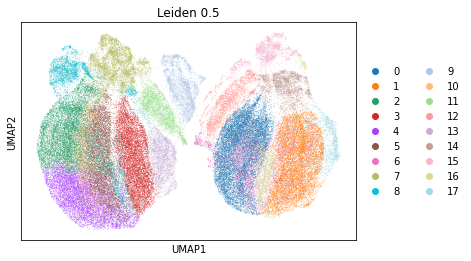

In [102]:
ep.pp.knn_impute(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

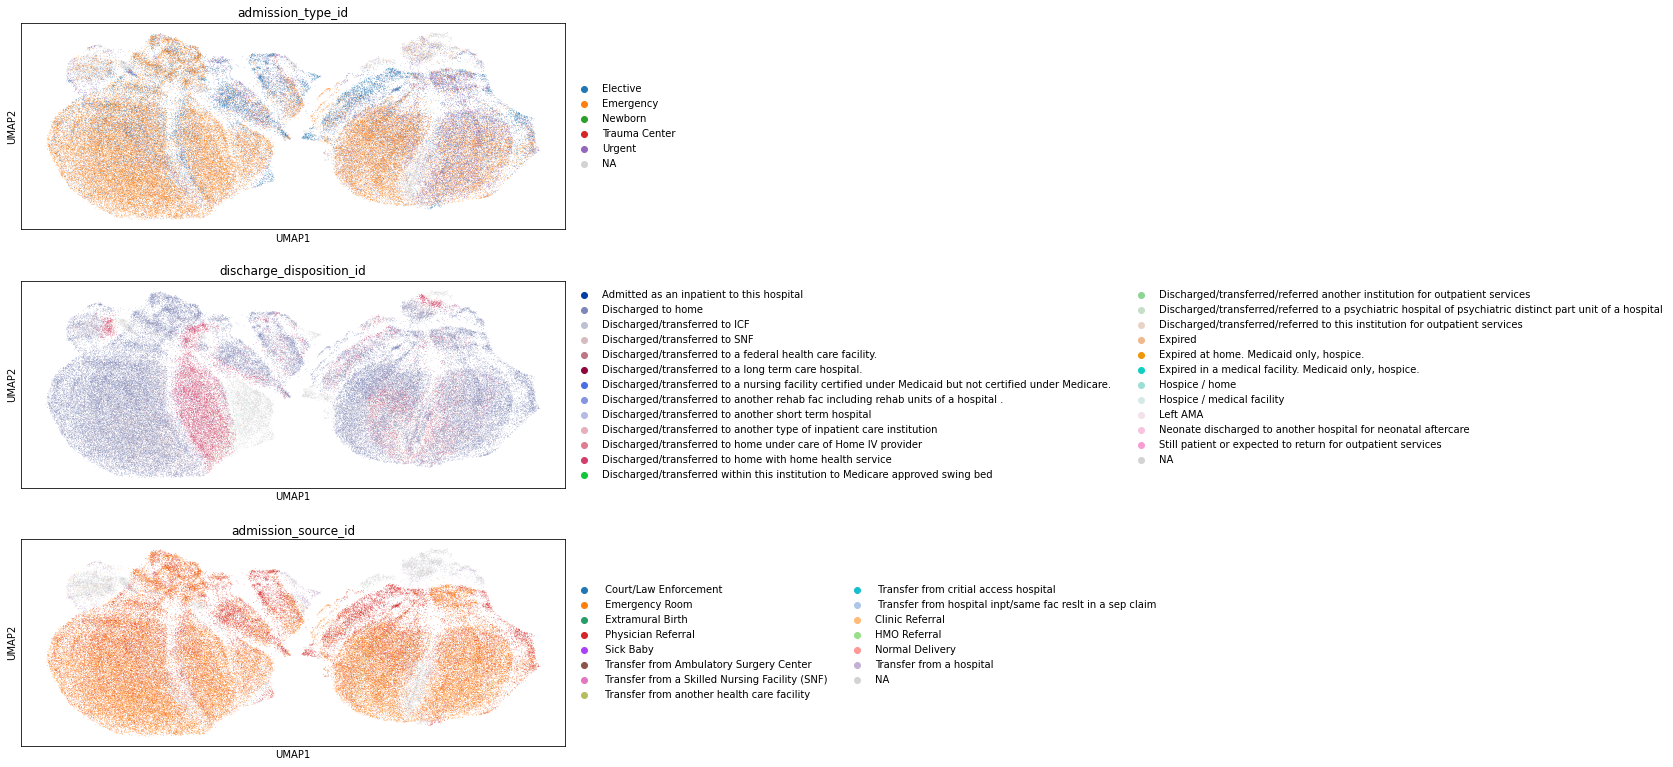

In [105]:
ep.pl.umap(adata, color=["admission_type_id", "discharge_disposition_id", "admission_source_id",], ncols=1, wspace=0.75)

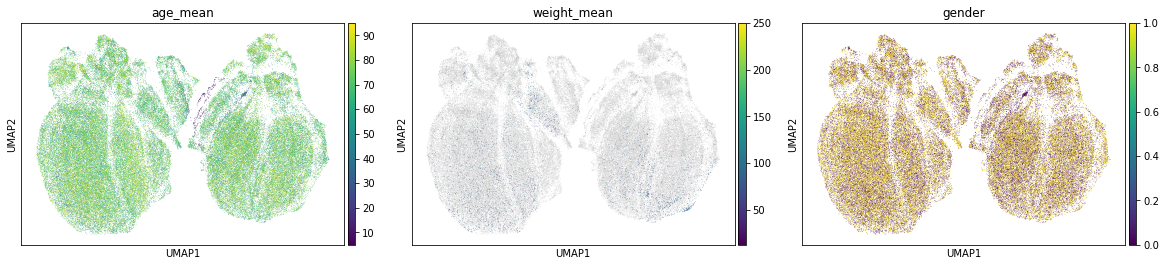

In [112]:
ep.pl.umap(adata, color=["age_mean", "weight_mean", "gender"], wspace=0.1)

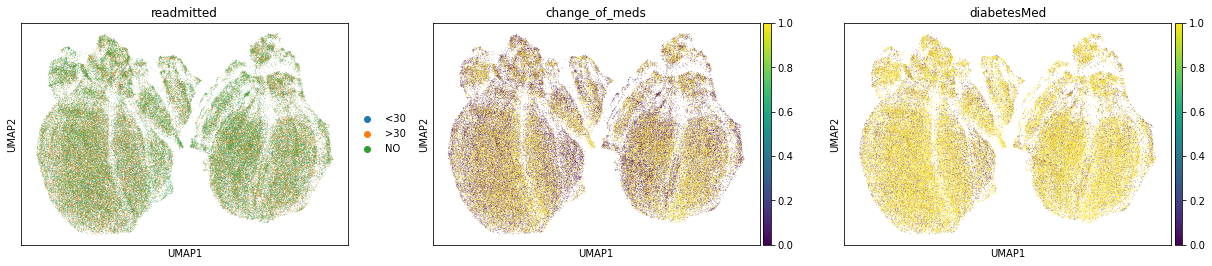

In [114]:
ep.pl.umap(adata, color=["readmitted", "change_of_meds", "diabetesMed"])

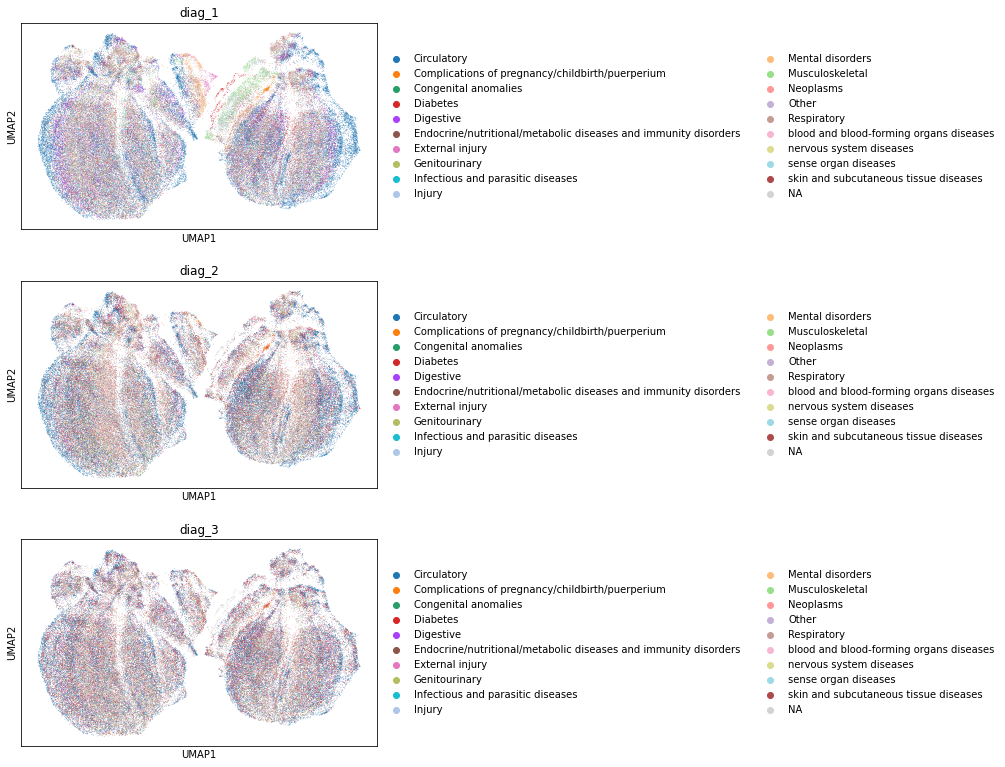

In [115]:
ep.pl.umap(adata, color=["diag_1", "diag_2", "diag_3"],ncols=1)